# Classification. Logistic Regression & SVM model

Цель практики: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.\
Описание задания:\
Необходимо решить задачу классификации физических лиц по уровню дохода. Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K.  Бинарная классификация. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д.\
Результат: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("D:/GITHUB/ML_lessons/Datasets/adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


###### Проверяем категореальные колонки на корректность данных

In [5]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [7]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [8]:
# Очищаем датафрейм от строк с отсутствующими данными
df = df.loc[(df['workclass']!='?') & (df['occupation']!='?') & (df['native-country']!='?')]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


#### Построим гистограммы числовых параметров

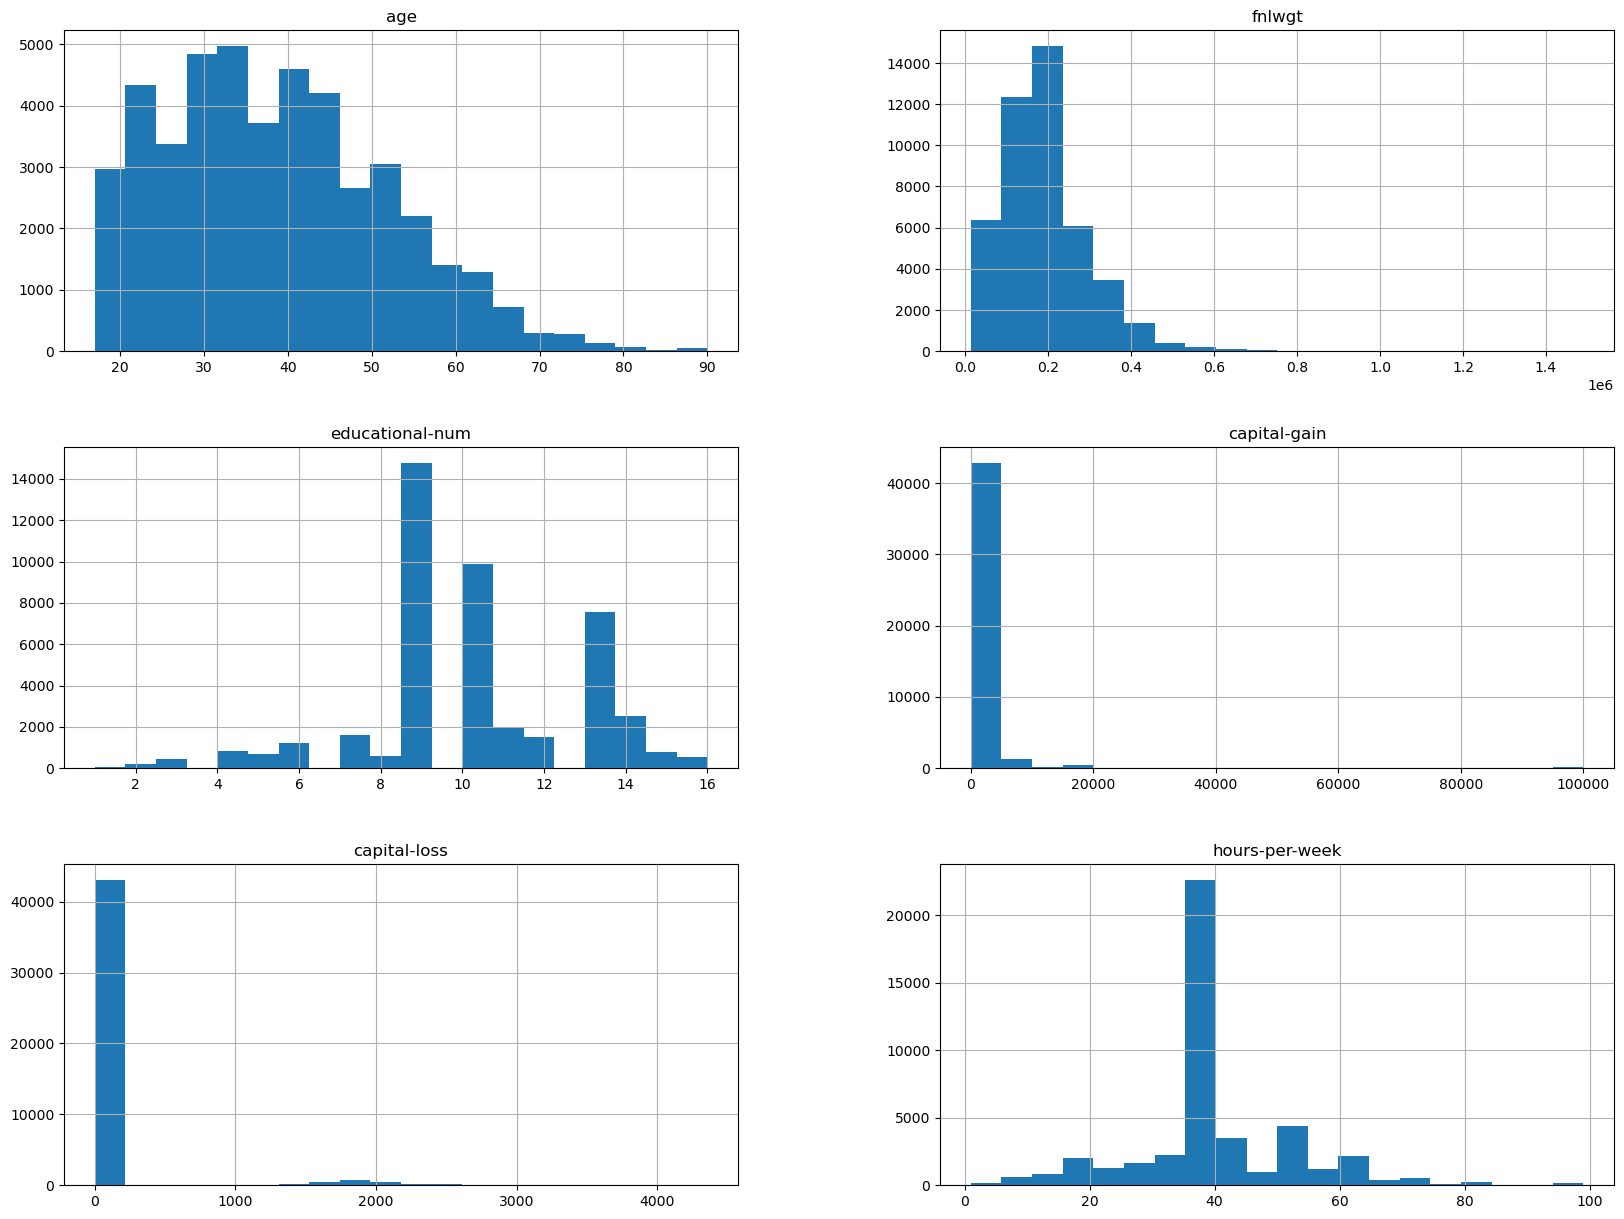

In [10]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

 #### Рассмотрим влияние некоторых числовых параметров на уровень дохода

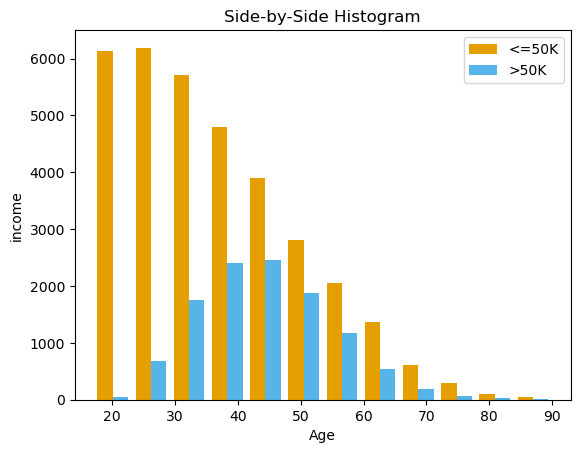

In [11]:
x1 = list(df[df['income'] == '<=50K']['age'])
x2 = list(df[df['income'] == '>50K']['age'])

colors = ['#E69F00', '#56B4E9']
names = ['<=50K', '>50K']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Age')
plt.ylabel('income')
plt.title('Side-by-Side Histogram')
plt.show()

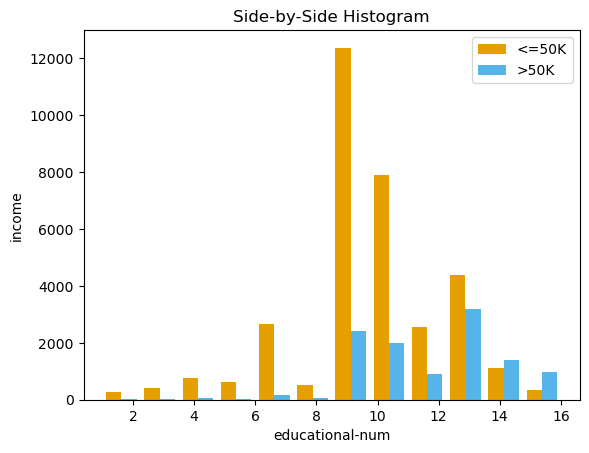

In [12]:
x1 = list(df[df['income'] == '<=50K']['educational-num'])
x2 = list(df[df['income'] == '>50K']['educational-num'])

colors = ['#E69F00', '#56B4E9']
names = ['<=50K', '>50K']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('educational-num')
plt.ylabel('income')
plt.title('Side-by-Side Histogram')
plt.show()


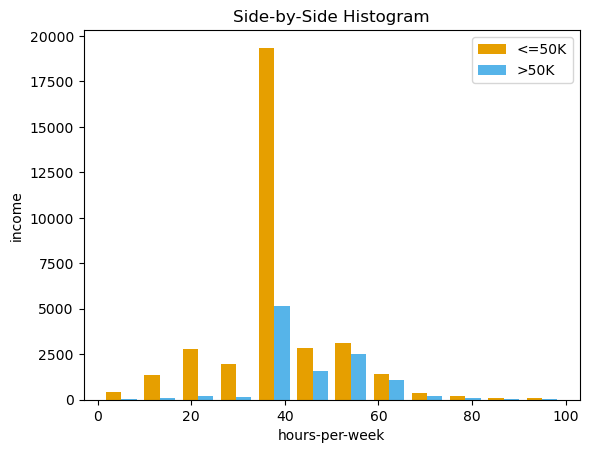

In [13]:
x1 = list(df[df['income'] == '<=50K']['hours-per-week'])
x2 = list(df[df['income'] == '>50K']['hours-per-week'])

colors = ['#E69F00', '#56B4E9']
names = ['<=50K', '>50K']

plt.hist([x1, x2], bins = int(180/15),
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('hours-per-week')
plt.ylabel('income')
plt.title('Side-by-Side Histogram')
plt.show()

Четко прослеживается зависимость увеличения дохода в зависимости от возраста: в активной фазе жизни (от 30-ти до 55) люди зарабатывают больше. Также видна четкая зависимость от уровня образования. От количества часов работы в неделю зависимость не слишком явная. Не будем этот критерий использовать в модели. 

In [14]:
from sklearn.linear_model import LogisticRegression

#### Выберем данные для модели .

In [15]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [16]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
X = pd.get_dummies(df.loc[:, ['age', 'workclass', 'educational-num', 'occupation', 'relationship',\
                              'race', 'gender', 'native-country']])

In [18]:
X.head()

,age,educational-num,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# целевая переменная (столбец income) является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
le.fit(df['income'])

LabelEncoder()

In [21]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [22]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series(data=le.transform(df['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [23]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

#### Обучим модель .
Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [26]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 0, 1, 0, 0])

Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.

In [27]:
model.score(X_train, y_train)

0.8267683887552865

In [28]:
model.score(X_test,y_test)

0.8290768380320619

### Обучим модель по методу опорных Векторов SVM

In [29]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [30]:
clf.score(X_train, y_train)

0.8293943665865052

In [31]:
clf.score(X_test, y_test)

0.8233278054173576

#### Сравнивая две модели: точность предсказания сопоставимая. Модель SVM затрачивает больше ресурсов (вычислительная мощность, время) 

### Попробуем повысить точность предсказания, добавив в выборку дополнительные параметры

In [32]:
X = pd.get_dummies(df.loc[:, ['age', 'workclass', 'educational-num', 'occupation', 'marital-status','relationship',\
                              'race', 'gender','capital-gain', 'capital-loss', 'native-country']])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [35]:
model.score(X_train, y_train)

0.8461729828343976

In [36]:
model.score(X_test,y_test)

0.8476506357103372

#### Подтвердилась гипотеза, что время работы в неделю не сильно влияет на уровень дохода: при добавлении критерия 'hours-per-week' точность предсказания меняется незначительно. 

#### Повысить точность предсказания 1,7% удалось при добавлении критериев: 'marital-status', 'capital-gain', 'capital-loss'

# Loss functions and optimization

Цель практики: изучить применение методов оптимизации для решения задачи классификации
1. Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.
2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.
3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.
4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).
5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).
6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [37]:
import pandas as pd
import numpy as np
import scipy.stats 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
from sklearn.datasets import load_iris

In [39]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
# Формируем датафрейм, искдючаем таргет = 0 'sertosa', преобразуем признаки из 1 и 2 в 0 и 1
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target']) 
df_iris = df_iris[(df_iris['target'] !=0)]
df_iris['target'][(df_iris['target'] ==1)] = 0
df_iris['target'][(df_iris['target'] ==2)] = 1

In [43]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0.0
51,6.4,3.2,4.5,1.5,0.0
52,6.9,3.1,4.9,1.5,0.0
53,5.5,2.3,4.0,1.3,0.0
54,6.5,2.8,4.6,1.5,0.0


In [44]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
 2   petal length (cm)  100 non-null    float64
 3   petal width (cm)   100 non-null    float64
 4   target             100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB


In [45]:
X = df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_iris['target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Реализация Логистической Регрессии Градиентный спуск

In [47]:
# Расчёт логистической функции
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [48]:
# Расчёт функции потерь на основе бинарной кросс-энтропии
def loss(predict, y):
    return ((-y) * np.log(predict) - (1 - y) * np.log(1 - predict)).mean()

In [49]:
def transposition(X):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    return X

In [50]:
# Предсказание вероятности
def predict_proba(X, theta, fit_intercept=True):
    if len(theta) - 1 == X.shape[1]:
        transposition(X)
    z = np.dot(X, theta)
    return sigmoid(z)

In [51]:
# Предсказание класса на основе вероятностей
def predict(prediction_proba, rate=0.5):
    return np.asarray([0 if x < rate else 1 for x in prediction_proba])

In [52]:
# Градиентный спуск
def lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    for i in range(max_iter):

        prediction = predict_proba(X, theta) # Предсказание значений
        gradient = np.dot(X.T, (prediction - y)) / y.size # Рассчёт градиента
        theta -= learning_rate * gradient # Сдвиг оценки коэффициентов
        
        preds.append(prediction)
        costs.append(loss(prediction, y))
        
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction

In [53]:
import time

In [54]:
start_time = time.time()
hand_model = lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
end_time = time.time() - start_time
hand_predict = predict(predict_proba(X_test,hand_model[0]))
hand_score = accuracy_score(y_test, hand_predict)
print(f'Время работы градиентный спуск = {end_time:.3f}')
print(f'Точность предсказания = {hand_score}')

Время работы градиентный спуск = 0.053
Точность предсказания = 0.95


### Логистическая регрессия метод скользящего среднего (Root Mean Square Propagation, RMSProp)

In [55]:
def rmsprop_lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001, decay_rate=0.9):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    
    cache=np.zeros(X.shape[1])
    caches=[]
    for i in range(max_iter):
        prediction = predict_proba(X,theta)
        gradient = np.dot(X.T, (prediction - y)) / y.size
        
        cache = decay_rate * cache+ (1 - decay_rate) * gradient**2
        caches.append(cache)
       
        theta += -learning_rate * gradient / (np.sqrt(cache) + eps)
       
        preds.append(prediction)
        costs.append(loss(prediction, y))
       
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction, caches

In [56]:
start_time = time.time()
rmsprop_model = rmsprop_lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
rmsprop_end_time = time.time() - start_time
rmsprop_predict = predict(predict_proba(X_test, rmsprop_model[0]))
rmsprop_score = accuracy_score(y_test, rmsprop_predict)
print(f'Время работы реализации RMSProp = {rmsprop_end_time:.3f}')
print(f'Точность предсказания = {rmsprop_score}')

Время работы реализации RMSProp = 0.049
Точность предсказания = 0.85


### Логистическая регрессия по Нестерову метод адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam)

In [57]:
def nadam_lr_model(X, y, fit_intercept=True, max_iter=100, learning_rate=0.05, eps=0.000001, gamma=0.9):
    if fit_intercept is True:
        transposition(X)
    theta = np.ones(X.shape[1])
    costs = []
    preds = []
    v=0
    vs=[]
    for i in range(max_iter):
        prediction=predict_proba(X, theta)
        gradient = np.dot(X.T, (prediction - y)) / y.size
        v = gamma * v - learning_rate * gradient
        
        vs.append(v)
        theta += v
        
        preds.append(prediction)
        costs.append(loss(prediction, y))
       
        if i > 0:
          if abs(costs[-1] - costs[-2]) < eps:
            break
    return  theta, costs, prediction, vs

In [58]:
start_time = time.time()
nadam_model = nadam_lr_model(X_train, y_train, max_iter=100, learning_rate=0.05)
nadam_end_time = time.time() - start_time
nadam_predict = predict(predict_proba(X_test, nadam_model[0]))
nadam_score = accuracy_score(y_test, nadam_predict)
print(f'Время работы реализации NADAM = {nadam_end_time:.3f}')
print(f'Точность предсказания = {nadam_score}')

Время работы реализации NADAM = 0.050
Точность предсказания = 0.9


### Логистическая регрессия библиотека Sklearn

In [59]:
lr = LogisticRegression(max_iter=100, tol=0.05)

In [60]:
start_time = time.time()
lr.fit(X_train, y_train)
lib_end_time = time.time() - start_time
lib_predict = lr.predict(X_test)
lib_score = accuracy_score(y_test, lib_predict)
print(f'Время работы sklearn LogisticRegression = {lib_end_time:.3f}')
print(f'Точность предсказания = {lib_score}')

Время работы sklearn LogisticRegression = 0.008
Точность предсказания = 0.95


### Вывод:
Проведена оценка нескольких моделей на основании разных методов. Получены следующие результаты:

In [62]:
print(f'Градиентный спуск: accuracy_score = {hand_score}, время = {end_time:.3f}')
print(f'RMSProp Logistic Regression: accuracy_score = {rmsprop_score}, время = {rmsprop_end_time:.3f}')
print(f'Nadam Logistic Regression: accuracy_score = {nadam_score}, время = {nadam_end_time:.3f}')
print(f'Sklearn Logistic Regression: accuracy_score = {lib_score}, время = {lib_end_time:.3f}')

Градиентный спуск: accuracy_score = 0.95, время = 0.053
RMSProp Logistic Regression: accuracy_score = 0.85, время = 0.049
Nadam Logistic Regression: accuracy_score = 0.9, время = 0.050
Sklearn Logistic Regression: accuracy_score = 0.95, время = 0.008


Градиентный спуск показывает те же результаты, что и стандартная библиотека SKlearn, но работает значительно медленнее.
Методы скользящего среднего и ускоренного по Нестерову метода адаптивной оценки моментов показывают результаты ниже, по времени
сопоставимы с Градиентным спуском

# Model accuracy assessment, retraining, regularization

Цель практики: закрепить знания о математическом смысле метрик TPR, FPR.Изучить построение ROC-кривой, графика Precision-Recall.
Описание задания:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall.

In [2]:
# Импрортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/GITHUB/ML_lessons/Datasets/athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


#### Проверим датасет на наличие пропущеных значений. Удалим пустые значения

In [5]:
df[pd.isnull(df['dob'])].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,NaN,NaN,sailing,0,0,0


In [9]:
print('Пустых строк для height ' + str(len(df[pd.isnull(df['height'])])))
print('Пустых строк для weight ' + str(len(df[pd.isnull(df['weight'])])))
print('Всего строк в датафрейме ' + str(len(df)))

Пустых строк для height 330
Пустых строк для weight 659
Всего строк в датафрейме 11538


In [13]:
# удалим строки с пустыми значениями веса и роста
df = df[pd.isnull(df['height']) == 0]
df = df[pd.isnull(df['weight']) == 0]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


#### Закодируем категориальные признаки и выберем данные для модели

In [15]:
df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

В определении пола спортсмена играет роль вид спорта а также национальность спортсмена. Используем эти признаки для обучения модели. Чтобы оптимизировать количество признаков будем использовать бинарную кодировку, идея которой, использование принципа перевода десятичных чисел в двоичное представление. Принцип перевода заключается в том, что десятичное число N можно представить log(N), где log - логарифм по основанию 2, бинарными значениями, принимающими значения {0,1}.

In [53]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

     ---------------------------------------- 81.8/81.8 kB 1.1 MB/s eta 0:00:00


In [54]:
bn = BinaryEncoder()

In [60]:
bn_nat = pd.DataFrame(bn.fit_transform(df[['nationality']]))
bn_nat.head()

,nationality_0,nationality_1,nationality_2,nationality_3,nationality_4,nationality_5,nationality_6,nationality_7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,1


In [57]:
bn_df = pd.DataFrame(bn.fit_transform(df[['sport']]))
bn_df.head()

,sport_0,sport_1,sport_2,sport_3,sport_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,1
4,0,0,1,0,0


In [61]:
final_df = df.join (bn_df)
final_df = final_df.join (bn_nat)
final_df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,...,sport_3,sport_4,nationality_0,nationality_1,nationality_2,nationality_3,nationality_4,nationality_5,nationality_6,nationality_7
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,...,0,1,0,0,0,0,0,0,0,1
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,...,1,0,0,0,0,0,0,0,1,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,...,0,1,0,0,0,0,0,0,1,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,...,1,1,0,0,0,0,0,1,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,...,0,0,0,0,0,0,0,1,0,1


In [62]:
final_df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze', 'sport_0', 'sport_1', 'sport_2', 'sport_3',
       'sport_4', 'nationality_0', 'nationality_1', 'nationality_2',
       'nationality_3', 'nationality_4', 'nationality_5', 'nationality_6',
       'nationality_7'],
      dtype='object')

In [97]:
X = final_df[['gold', 'silver', 'bronze', 'height', 'weight',  'sport_0', 'sport_1', 'sport_2', 'sport_3',
       'sport_4', 'nationality_0', 'nationality_1', 'nationality_2',
       'nationality_3', 'nationality_4', 'nationality_5', 'nationality_6',
       'nationality_7']]

In [98]:
X.head()

,gold,silver,bronze,height,weight,sport_0,sport_1,sport_2,sport_3,sport_4,nationality_0,nationality_1,nationality_2,nationality_3,nationality_4,nationality_5,nationality_6,nationality_7
0,0,0,0,1.72,64.0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1.68,56.0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,1.98,79.0,0,0,0,0,1,0,0,0,0,0,0,1,1
3,0,0,0,1.83,80.0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,0,0,0,1.81,71.0,0,0,1,0,0,0,0,0,0,0,1,0,1


In [99]:
X.columns

Index(['gold', 'silver', 'bronze', 'height', 'weight', 'sport_0', 'sport_1',
       'sport_2', 'sport_3', 'sport_4', 'nationality_0', 'nationality_1',
       'nationality_2', 'nationality_3', 'nationality_4', 'nationality_5',
       'nationality_6', 'nationality_7'],
      dtype='object')

In [100]:
le = LabelEncoder()

In [101]:
# преобразуем 'sex' в числовое значение и запишем ее в таргетную переменную y
le.fit(df['sex'])

LabelEncoder()

In [102]:
le.classes_

array(['female', 'male'], dtype=object)

In [103]:
y = pd.Series(data=le.transform(df['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

#### Разобьем выборку на обучающую и тестовую и обучим модель

In [104]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [107]:
model.score(X_train, y_train)

0.789776652083813

In [108]:
model.score(X_test, y_test)

0.7730202578268877

In [113]:
predictions = model.predict_proba(X_test)
predictions

array([[0.17385769, 0.82614231],
       [0.77387922, 0.22612078],
       [0.41343562, 0.58656438],
       ...,
       [0.32373671, 0.67626329],
       [0.308182  , 0.691818  ],
       [0.90751673, 0.09248327]])

#### Построим ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [110]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

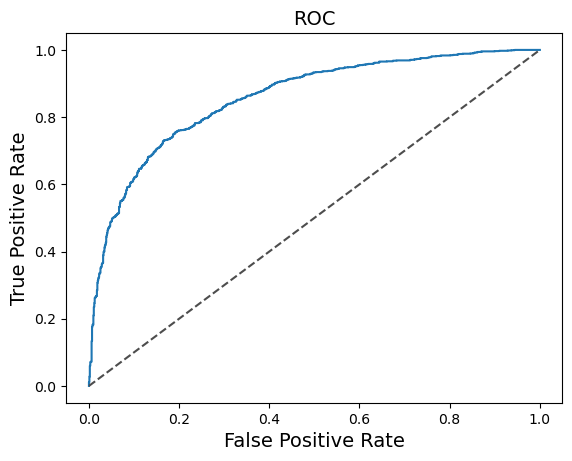

In [144]:
plt.plot( fpr, tpr )
plt.title('ROC', fontdict={'fontsize': 14})
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlabel('False Positive Rate', fontdict={'fontsize': 14})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 14})
plt.show()

#### Вычислим значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [112]:
roc_auc_score(y_test, predictions[:, 1])

0.8570759217538069

#### Реализуем подсчет метрик TPR, FPR с помощью матрицы ошибок и построим визуализацию. 

**TPR (True Positive Rate, доля верных срабатываний)** - отношение числа верных срабатываний к размеру положительного класса:

$$TPR = \frac{TP}{TP+FN}$$

TPR  представляет из себя полноту - сколько раз модель правильно нашла целевой класс.

Данная метрика в идеале должна стремиться к единице.


**FPR (False Positive Rate, доля ложных срабатываний)** - отношение числа ложных срабатываний к общему размеру отрицательного класса:
$$FPR = \frac{FP}{FP+TN}$$

Данная метрика в идеале должна стремиться к нулю.

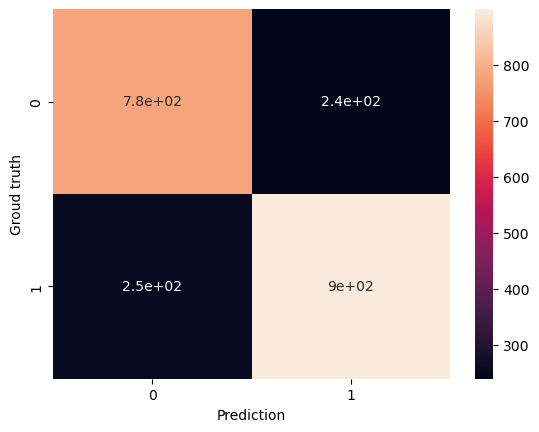

In [114]:
threshold = 0.5
pred = np.where(predictions[:, 1] >= threshold, 1, 0)

cm = confusion_matrix(y_test, pred)
f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

In [117]:
cm

array([[780, 239],
       [254, 899]], dtype=int64)

In [115]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [116]:
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

TPR 0.779705117085863
FPR 0.23454367026496564


#### Реализуем подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [145]:
thresholds = np.arange(0, 1, 0.1)
fprs = []
tprs = []
prs = []
rec = []
pr_custom = []
for threshold in thresholds:
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr2 = tp/(tp + fn)
    fpr2 = fp/(fp + tn)
    precision = tp/(tp + fp)
    recall = tpr2 #по определению
    fprs.append(fpr2)
    tprs.append(tpr2)
    prs.append(precision)
    rec.append(recall)

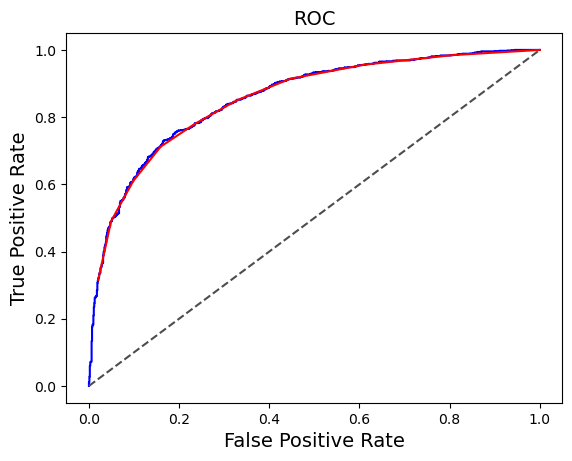

In [146]:
plt.plot( fpr, tpr, color = 'blue' )
plt.plot( fprs, tprs, color = 'red' )
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.title('ROC', fontdict={'fontsize': 14})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 14})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 14})
plt.show()

### Вывод: 
#### Графики библиотечного и ручного подсчета совпадают, поскольку используются одни и теже методв рассчета. В ручную посчитали правильно

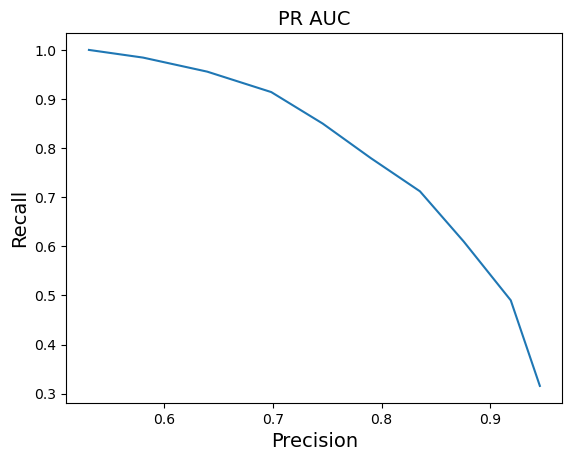

In [130]:
plt.plot(prs, rec)
plt.title('PR AUC', fontdict={'fontsize': 14})
plt.xlabel('Precision', fontdict={'fontsize': 14})
plt.ylabel('Recall', fontdict={'fontsize': 14})
plt.show()

### Выводы по проделанной работе
##### Из графиков видно, что Roc-кривая лежит достаточно далеко от диагонали, и стремится к прямоегольнику. Из этого сделаем вывод, что модель обучилась достаточно зорошо, также мы получили достаточно высокую метрику Roc-AUC = 0.8570759217538069. ROC- кривая может проходить ниже диагонали, но это значит, что перепутаны значения ошибок первого и второго рода и их надо поменять местами. 

# Data Quality

Цель практики: применить на практике методы по оценке качества данных.

In [147]:
# Импрортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib import pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv("D:/GITHUB/Machine_Lerning/Datasets/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Удаляем все пропущенные значения и категориальные переменные. Разделим данные для обучения модели

In [152]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [158]:
data = df[['Survived','Pclass','Age', 'SibSp', 'Parch', 'Fare']]
data = data[pd.isnull(data['Age']) == 0]

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     714 non-null    int64  
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [160]:
X = data[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]

In [161]:
y = data['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Разделим выборку на тестовую и обучающую

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Создадим модель с нормализацией данных. Обучим модель

In [164]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [165]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Посчитаем FPR и TPR, построим график, рассчитаем метрику ROC-AUC

In [166]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

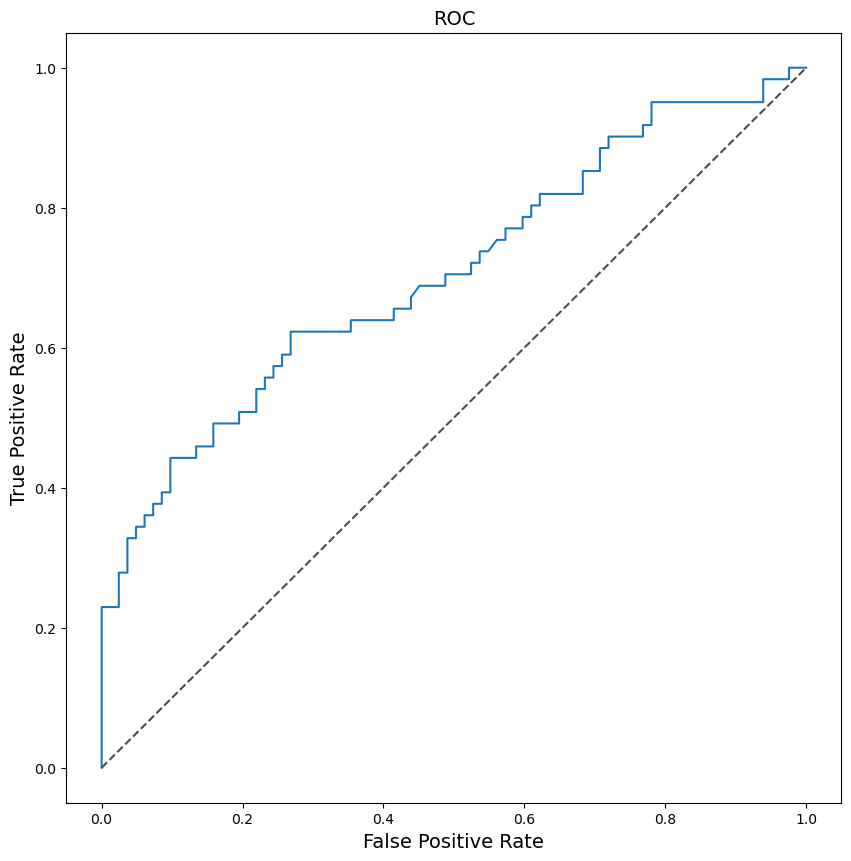

In [170]:
plt.figure(figsize=(10, 10))
plt.plot( fpr, tpr )
plt.title('ROC', fontdict={'fontsize': 14})
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlabel('False Positive Rate', fontdict={'fontsize': 14})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 14})
plt.show()

In [171]:
roc_auc_score(y_test, predictions[:, 1])

0.7059176329468212

Снова возьмем полные данные, постараемся улучшить модель

In [174]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Для построения модели не имеют значения имя пасажира, порядковый номер и номер билета. Поэтому не будем использовать их в модели. Номер каюты может влиять на условие выживания пасажира, но этих данных мало и если мы будем использовать этот признак, потеряем 77% данных, где он не заполнен. Не будем его использовать

In [183]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [186]:
data = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

Колонки Age и Embarked содержат пропуски. Посчитаем процент потерь если их просто удалим

In [187]:
data[pd.isnull(data['Embarked'])].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [193]:
print('Процент потерь данных при удалении строк с пустым Embarked ' + str(len(data[pd.isnull(data['Embarked'])])/len(data)*100))
print('Процент потерь данных при удалении строк с пустым Age ' + str(len(data[pd.isnull(data['Age'])])/len(data)*100))

Процент потерь данных при удалении строк с пустым Embarked 0.22446689113355783
Процент потерь данных при удалении строк с пустым Age 19.865319865319865


Заполним пропуски: Age - медианным значением, Embarked - значением с наибольшим значением

In [202]:
# Медианное значение для Age возьмем из описательной статистики датафрейма выше
data.loc[data['Age'] == 'NaN', 'Age'] = 28

In [194]:
df_port = data.groupby('Embarked').count()['Pclass']
df_port.head()

Embarked
C    168
Q     77
S    644
Name: Pclass, dtype: int64

In [203]:
data.loc[data['Embarked'] == 'NaN', 'Embarked'] = 'S'

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Преобразуем категориальные признаки

In [224]:
data = pd.get_dummies(data.loc[:, ['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])

In [225]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Проверим данные на наличие выбросов с помощью визуализации boxplot

C:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


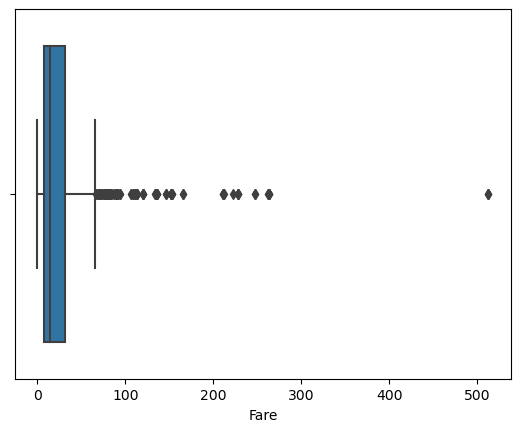

In [226]:
sns.boxplot(data['Fare'])
plt.show()

C:\Users\lokky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

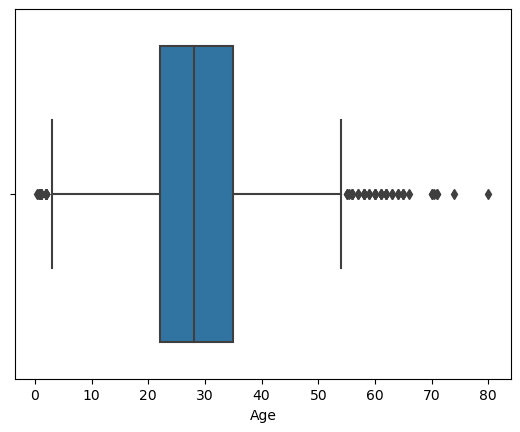

In [227]:
sns.boxplot(data['Age'])

In [233]:
print(np.where(data['Fare']>300.0))
print(np.where(data['Age']>70.0))

(array([258, 679, 737], dtype=int64),)
(array([ 96, 116, 493, 630, 851], dtype=int64),)


Возраст пассажиров достаточно плотно распределен,хотя на визуализации видно, что пассажиры старше 55лет определяются как выбросы. 5 значений - пассажиры старше 75 лет. Логично что на борту были и старики. Не будем удалять эти данные, оставим для обучения модели. Стоимость билета выше 500$ представляется чистым выбросом. Таких значений 3. Удалим ихи

In [235]:
upper_array = np.where(data['Fare']>300.0)[0]
data.drop(index=upper_array, inplace=True)

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    888 non-null    int64  
 1   Pclass      888 non-null    int64  
 2   Age         888 non-null    float64
 3   SibSp       888 non-null    int64  
 4   Parch       888 non-null    int64  
 5   Fare        888 non-null    float64
 6   Sex_female  888 non-null    uint8  
 7   Sex_male    888 non-null    uint8  
 8   Embarked_C  888 non-null    uint8  
 9   Embarked_Q  888 non-null    uint8  
 10  Embarked_S  888 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 52.9 KB


In [255]:
import plotly.express as px
pclass_counts = data.Pclass.value_counts()
fig_pclass_perc = px.pie(data, names= pclass_counts.index, values = pclass_counts.values, title=f'Distribution of Pclass', hole=0.2, color_discrete_sequence=px.colors.sequential.Viridis)
fig_pclass_perc.update_traces(textinfo='percent+label')
fig_pclass_perc.update_layout(legend_title_text='Categories:', legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig_pclass_perc.show()

In [256]:
fig_pclass_surv = px.histogram(data, x = 'Pclass', barmode = 'group', color = 'Survived', color_discrete_sequence=px.colors.sequential.Viridis)
fig_pclass_surv.update_layout(title = 'Survival according to passenger classes', plot_bgcolor = 'white')
fig_pclass_surv.show()

#### Вывод:
Из диаграммы видно, что шансов выжить у пассажиров первого класса было больше, чем у остальных. Но поскольку пассажиров 3-го класса было больше, спаслись примерно одинаковое количество пассажиров

Преобразуем возраст в новый категориальный признак и добавим его в датасет для построения модели

In [257]:
bins = [-np.inf, 17, 32, 45, 50, np.inf]
labels = ["Children", "Young", "Mid-Aged", "Senior-Adult", 'Elderly']
data['Age_Group'] = pd.cut(data['Age'], bins = bins, labels = labels)

In [259]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,Young
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,Mid-Aged
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,Young
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,Mid-Aged
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,Mid-Aged


In [258]:
data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_Group'],
      dtype='object')

In [261]:
X = pd.get_dummies(data.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_Group']])

In [262]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group_Children,Age_Group_Young,Age_Group_Mid-Aged,Age_Group_Senior-Adult,Age_Group_Elderly
0,3,22.0,1,0,7.2500,0,1,0,0,1,0,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0,0


In [263]:
y = data['Survived']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [265]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [266]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Посчитаем FPR и TPR, построим график, рассчитаем метрику ROC-AUC

In [267]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])

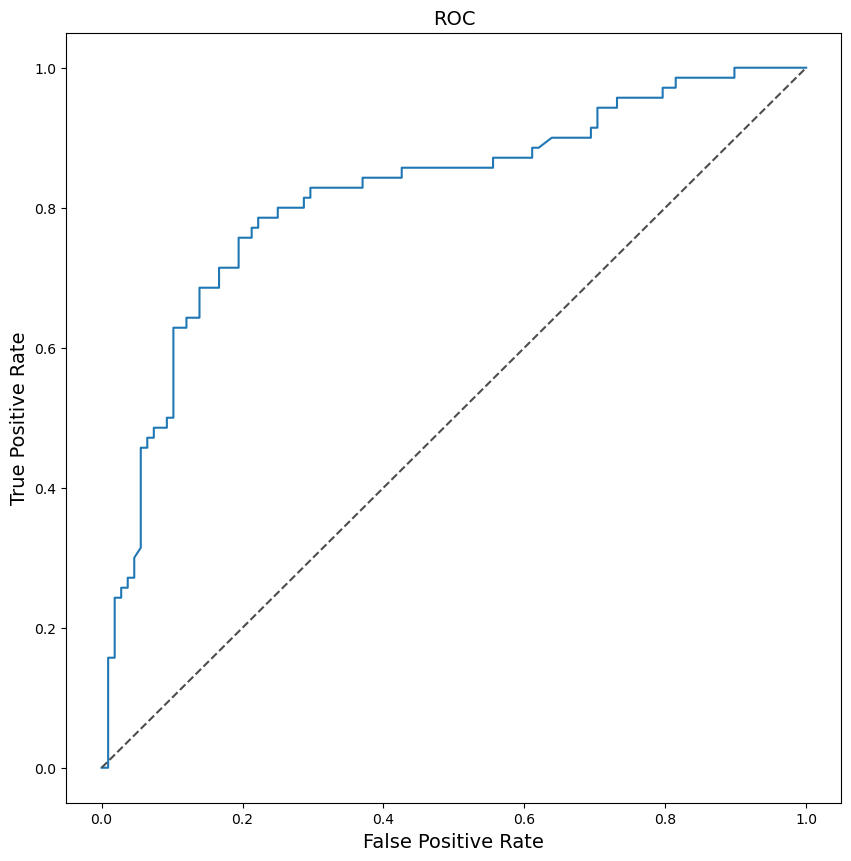

In [268]:
plt.figure(figsize=(10, 10))
plt.plot( fpr, tpr )
plt.title('ROC', fontdict={'fontsize': 14})
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlabel('False Positive Rate', fontdict={'fontsize': 14})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 14})
plt.show()

In [269]:
roc_auc_score(y_test, predictions[:, 1])

0.81739417989418

### Выводы по проделанной работе:
Для построения второй модели были заполнены пропуски в колонке Age и Embarked, чтобы не потерять 20% данных. Категориальные признаки были переведены в числовые, для использования в модели обучения. Также был создан новый категориальный признак Age_Group, который также участвовал в обучении модели. Удалены аномальные значения (выбросы), которые могли негативно отразиться на качестве модели. 
Результат проделанных преобразований видно из сравнения метрик ROC_AUC:
ROC_AUC = 0.7059 - необработанные данные
ROC_AUC = 0.8173 - данные после обработки
Повышение качества модели на 11%
Работа с данными, преобразование и удаление аномалий позволило существенно улучшить модель. Считаю, что на больших данных таких преобразований нужно делать меньше, поскольку массив для обучения больше и нужно находить оптимальное соотношение качества модели и времени отработки запроса. 